In [4]:
import numpy as np
import pandas as pd

In [35]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# load data

In [17]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col = 0 )
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [18]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
55355,55355,9195762,11057846,35000,35000,35000.0,36 months,15.10,1215.01,C,...,0,0,0,1,0,0,0,0,0,0
201266,201266,1493324,1753639,4800,4800,4800.0,36 months,8.90,152.42,A,...,0,1,0,1,0,0,0,0,0,0
83175,83175,7514703,9176844,9500,9500,9500.0,36 months,15.61,332.17,C,...,0,0,0,1,0,0,0,0,0,0
188356,188356,1681847,1964477,26000,26000,26000.0,36 months,7.90,813.55,A,...,0,0,0,1,0,0,0,0,0,0
244824,244824,35723432,38418860,9000,9000,9000.0,36 months,6.49,275.81,A,...,0,1,0,1,0,0,0,0,0,0


In [7]:
loan_data_inputs_train.shape

(373028, 207)

In [8]:
loan_data_targets_train.shape

(373028, 1)

In [9]:
loan_data_inputs_test.shape

(93257, 324)

In [10]:
loan_data_targets_test.shape

(93257, 1)

In [11]:
loan_data_targets_train

,good_bad
55355,1
201266,1
83175,1
188356,1
244824,1
...,...
333697,1
176338,0
96670,0
345742,1


In [19]:
for i in loan_data_inputs_train.columns:
    print(i)

Unnamed: 0.1
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
emp_length_int
term_int
earliest_cr_l

# selecting features

In [13]:
# wehave name relevant variable in listof relevant spreadsheet

In [16]:
loan_data_inputs_train

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
55355,55355,9195762,11057846,35000,35000,35000.0,36 months,15.10,1215.01,C,...,0,0,0,0,0,0,0,0,1,0
201266,201266,1493324,1753639,4800,4800,4800.0,36 months,8.90,152.42,A,...,0,0,0,0,0,0,0,0,1,0
83175,83175,7514703,9176844,9500,9500,9500.0,36 months,15.61,332.17,C,...,0,0,0,0,0,0,0,0,1,0
188356,188356,1681847,1964477,26000,26000,26000.0,36 months,7.90,813.55,A,...,0,0,0,0,1,0,0,0,1,0
244824,244824,35723432,38418860,9000,9000,9000.0,36 months,6.49,275.81,A,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333697,333697,12745353,14767556,4000,4000,4000.0,36 months,8.39,126.07,A,...,0,0,0,0,0,1,0,0,1,0
176338,176338,2827833,3410439,35000,35000,35000.0,60 months,22.47,976.04,E,...,0,0,0,0,0,0,0,0,1,0
96670,96670,6718916,8321237,28000,28000,27975.0,60 months,18.25,714.83,D,...,0,0,0,0,0,0,0,0,1,0
345742,345742,20969757,23252575,13375,13375,13375.0,36 months,15.61,467.66,D,...,0,0,0,0,0,1,0,0,0,1


In [20]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'terms:36',
'terms:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [21]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'terms:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [22]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
55355,0,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
201266,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
83175,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
188356,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
244824,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


## pD model estimation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


In [32]:
reg = LogisticRegression()

In [33]:
pd.options.display.max_rows =200

In [38]:
reg.fit(inputs_train, loan_data_targets_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
reg.intercept_

array([-1.35145758])

In [40]:
reg.coef_

array([[ 1.07128721e+00,  8.80897415e-01,  6.73861474e-01,
         4.94923365e-01,  3.28889684e-01,  1.98766638e-01,
         7.25774999e-02,  1.13181892e-01,  4.87330737e-02,
         5.09290924e-02,  6.44298293e-02,  6.17137608e-02,
         6.35864155e-02,  1.36487922e-01,  9.85121518e-02,
         1.99075941e-01,  2.06397096e-01,  2.28754630e-01,
         2.72632562e-01,  3.28952104e-01,  4.86188837e-01,
         8.68809128e-02, -1.16337495e-02,  2.75204360e-01,
         1.66788340e-01,  1.88907327e-01,  2.42040500e-01,
         5.32426949e-02,  5.74236853e-02,  1.22275265e-01,
         1.36016150e-01,  9.37754699e-02,  8.98808948e-02,
         1.42071541e-01,  1.08309261e+00,  9.05205363e-01,
         7.83717347e-01,  5.66081345e-01,  4.10376274e-01,
         1.84988312e-01, -8.32190785e-02,  9.70528093e-01,
         5.96892469e-01,  3.41172851e-01,  1.33130896e-01,
         4.53234744e-02,  3.12901776e-02,  5.04885204e-02,
         1.05785895e-01,  1.23685487e-01,  7.74239931e-0

In [41]:
feature_name = inputs_train.columns.values

In [42]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,intercept,-1.351458
1,grade:A,1.071287
2,grade:B,0.880897
3,grade:C,0.673861
4,grade:D,0.494923
5,grade:E,0.328890
6,grade:F,0.198767
7,home_ownership:OWN,0.072577
8,home_ownership:MORTGAGE,0.113182
9,addr_state:NM_VA,0.048733


In [43]:
# build logistic regression model with p-value

In [44]:
# in sklearn p_value is univariate (not multivariate) 
# to calculate multivariate pvalue in sklearn -> alter the fit method

In [45]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [46]:
reg = LogisticRegression_with_p_values()

In [48]:
reg.fit(inputs_train, loan_data_targets_train.values.ravel())

In [49]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,intercept,-1.351458
1,grade:A,1.071287
2,grade:B,0.880897
3,grade:C,0.673861
4,grade:D,0.494923
5,grade:E,0.328890
6,grade:F,0.198767
7,home_ownership:OWN,0.072577
8,home_ownership:MORTGAGE,0.113182
9,addr_state:NM_VA,0.048733


In [50]:
p_values = reg.p_values # pvalue for the coefficient of X not intercept 



In [51]:
p_values = np.append(np.nan, np.array(p_values))

In [52]:
summary_table['p_values']  = p_values

In [53]:
summary_table

,Feature name,Coefficients,p_values
0,intercept,-1.351458,NaN
1,grade:A,1.071287,3.017454e-31
2,grade:B,0.880897,3.018329e-47
3,grade:C,0.673861,9.587408e-33
4,grade:D,0.494923,3.076595e-20
5,grade:E,0.328890,7.416046e-12
6,grade:F,0.198767,7.358834e-05
7,home_ownership:OWN,0.072577,2.908681e-04
8,home_ownership:MORTGAGE,0.113182,5.637302e-19
9,addr_state:NM_VA,0.048733,1.310706e-01


In [54]:
round(summary_table, 4)
# remove non significant 
# if one or few represent significant -> include that all cate 

,Feature name,Coefficients,p_values
0,intercept,-1.3515,NaN
1,grade:A,1.0713,0.0000
2,grade:B,0.8809,0.0000
3,grade:C,0.6739,0.0000
4,grade:D,0.4949,0.0000
5,grade:E,0.3289,0.0000
6,grade:F,0.1988,0.0001
7,home_ownership:OWN,0.0726,0.0003
8,home_ownership:MORTGAGE,0.1132,0.0000
9,addr_state:NM_VA,0.0487,0.1311


In [55]:
# keep
# grade all significant 
# home_ownership all sig 
# address_state most sig 
# verification_status sig 1 of them 

# keep all up until delinquency in last 2 year (both not sig)

# keep all other dummy

# not keep
# delinq_2yrs
# open_acc
# pub_rec
# total_rev_hi_lim
# total_acc 


In [56]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'terms:36',
'terms:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [57]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'terms:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [58]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
55355,0,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
201266,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
83175,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
188356,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
244824,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [60]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train.values.ravel())

In [61]:
feature_name = inputs_train.columns.values

In [62]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.407320
1,grade:A,1.075702
2,grade:B,0.884367
3,grade:C,0.677847
4,grade:D,0.498938
5,grade:E,0.332391
6,grade:F,0.201356
7,home_ownership:OWN,0.074357
8,home_ownership:MORTGAGE,0.112113
9,addr_state:NM_VA,0.048783


In [63]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.407320,NaN
1,grade:A,1.075702,1.375747e-31
2,grade:B,0.884367,5.622022e-48
3,grade:C,0.677847,1.680022e-33
4,grade:D,0.498938,6.706711e-21
5,grade:E,0.332391,1.633613e-12
6,grade:F,0.201356,3.935094e-05
7,home_ownership:OWN,0.074357,2.002713e-04
8,home_ownership:MORTGAGE,0.112113,8.422221e-19
9,addr_state:NM_VA,0.048783,1.302431e-01


In [64]:
import pickle

In [65]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# Model validation

In [66]:
# out of sample validation test





In [67]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'terms:36',
'terms:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [68]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'terms:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [69]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
434713,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
129180,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
40477,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
280441,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
120927,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [70]:
# now we will use model to estimate the prob of default

y_hat_test = reg2.model.predict(inputs_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [71]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
# important to get raw predicct rather than cate predict 
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [73]:
y_hat_test_proba

#[ PD , 1 - PD ]

# we only need the prob of nondefault -> 1-pd , prob of being good borrower

array([[0.03933833, 0.96066167],
       [0.27043925, 0.72956075],
       [0.35393288, 0.64606712],
       ...,
       [0.0311137 , 0.9688863 ],
       [0.03512479, 0.96487521],
       [0.12848594, 0.87151406]])

In [74]:
y_hat_test_proba = y_hat_test_proba[:,1]

In [75]:
y_hat_test_proba

array([0.96066167, 0.72956075, 0.64606712, ..., 0.9688863 , 0.96487521,
       0.87151406])

In [76]:
loan_data_targets_test_temp = loan_data_targets_test

In [77]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [78]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis= 1)

In [79]:
df_actual_predicted_probs.shape

(93257, 2)

In [80]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [81]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [82]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
434713,1,0.960662
129180,1,0.729561
40477,1,0.646067
280441,1,0.962894
120927,1,0.868175


In [83]:
# how accurate the model is?

# Accuracy and Area Under the Curve

In [84]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1,0)

In [85]:
# pd.crosstab() to make a crosstab between loan data targets test
# crosstab => 1 variabvle broken down by the other variable 

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'] ,colnames = ['Predicted'])

# show a lot of false positive -> a lot of bad person will be given a loan

Predicted,0,1
Actual,,
0,7273,2980
1,35665,47339


In [86]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'] ,colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]



Predicted,0,1
Actual,,
0,0.077989,0.031955
1,0.382438,0.507619


In [87]:
((pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'] ,colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0] +
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'] ,colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1])


0.5856075147173939

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
         df_actual_predicted_probs['y_hat_test_proba']
         )

# 3 array 
# 1st: false positive rate
# 2nd: True positive rate
# 3rd: Thresholds

(array([0.        , 0.        , 0.        , ..., 0.99951234, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20476122e-05, 8.43332851e-05, ...,
        9.99975905e-01, 9.99975905e-01, 1.00000000e+00]),
 array([1.99215275, 0.99215275, 0.99128842, ..., 0.4780526 , 0.43819218,
        0.36680096]))

In [90]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
         df_actual_predicted_probs['y_hat_test_proba']
         )

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'True positive rate')

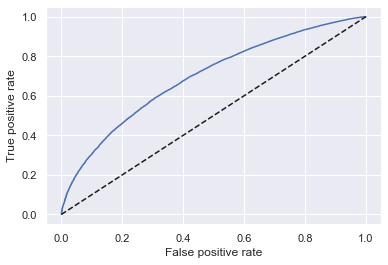

In [92]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, linestyle = '--',color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# we need some benchmark to compare to 

In [93]:
# AREA under ROC -> measure how good our model is
# if predict by chance : AUC - 50% 


In [94]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                     df_actual_predicted_probs['y_hat_test_proba']
                     )
AUROC

# auc bad if 50-60%

0.694667895943769

In [95]:
# Additional for classification model evaluation (popular in credit risk community)
# 1. Gini coefficient 
# 2. Kolmogorov-Smirnov coefficient 

In [96]:
# Gini :created as measure income inequality 
    # in crm :  Measure inequality between Non defaulted borrower and Default borrower in population
    # create by plot Cumulative% defaulted and a function of Cumulative % ALL
    # Gini coef = percetage of area above diagonally line enclose btw secondary diagonal line
    
# Kolmogorow-Smirnov
    # the maximum difference btw the cumulative distribution functions of good and bad boprrowers
    # the greater the different , the better the model 

# Gini and Kolmogorov-Smirnov

In [97]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [98]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.366801,0
41033,1,0.429482,0
42014,0,0.438192,0
39875,0,0.453455,0
42382,0,0.461125,0


In [99]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
285472,1,0.991586,1
241533,1,0.991614,1
264690,1,0.991826,1
244383,1,0.992145,1
256952,1,0.992153,1


In [100]:
# calculate cumulative proportion

df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [101]:
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.366801,0
1,41033,1,0.429482,0
2,42014,0,0.438192,0
3,39875,0,0.453455,0
4,42382,0,0.461125,0
...,...,...,...,...
93252,285472,1,0.991586,1
93253,241533,1,0.991614,1
93254,264690,1,0.991826,1
93255,244383,1,0.992145,1


In [102]:
# we need
# 1 the cumulative % of total population
# 2 the cumulative % of good borrowers
# 3 the cumulative % of bad borrowers

df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1 
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()



In [103]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.366801,0,1,1,0
1,41033,1,0.429482,0,2,2,0
2,42014,0,0.438192,0,3,2,1
3,39875,0,0.453455,0,4,2,2
4,42382,0,0.461125,0,5,2,3


In [104]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population']/ (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good']/ (df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad']/ (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())


In [105]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,285472,1,0.991586,1,93253,83000,10253,0.999957,0.999952,1.0
93253,241533,1,0.991614,1,93254,83001,10253,0.999968,0.999964,1.0
93254,264690,1,0.991826,1,93255,83002,10253,0.999979,0.999976,1.0
93255,244383,1,0.992145,1,93256,83003,10253,0.999989,0.999988,1.0
93256,256952,1,0.992153,1,93257,83004,10253,1.000000,1.000000,1.0


In [106]:
# GINI

Text(0.5, 1.0, 'Gini')

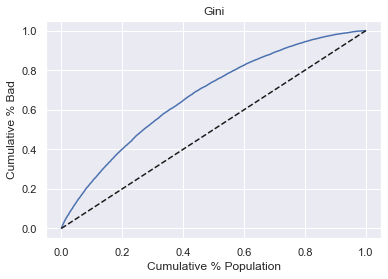

In [107]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'] )
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k' )
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title("Gini")

In [108]:
# Gini look like ROC 

# GINI = AUROC *2 -1
# Auroc = (Gini +1 )/2

Gini = AUROC *2 -1
Gini

0.389335791887538

# Kolmogorov-Smirnov

In [109]:
# perfect model -> set apart 2 cumulative model -> maximum distance  -> K- S = 1 
# predicting by chance -> Almost no distance -> K-s = 0

Text(0.5, 1.0, 'Kolmogorov Sminov')

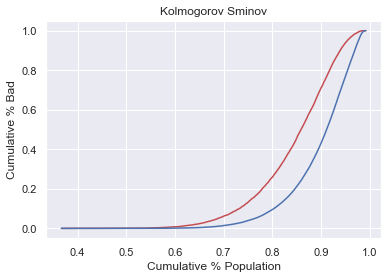

In [110]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'] , color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'] , color = 'b')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title("Kolmogorov Sminov")

# red - blue curve

In [111]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS
# 2 cumulative distribution are far away so that model have prediction power

0.28238351853191135

# Applying PD Model

## calculate prob of default for single customer

In [112]:
# multiply the borrower feature with independent variable coefficient
# but all of them is dummmy -> just SUM

In [113]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
434713,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
129180,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
40477,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
280441,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
120927,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [114]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.407320,NaN
1,grade:A,1.075702,1.375747e-31
2,grade:B,0.884367,5.622022e-48
3,grade:C,0.677847,1.680022e-33
4,grade:D,0.498938,6.706711e-21
5,grade:E,0.332391,1.633613e-12
6,grade:F,0.201356,3.935094e-05
7,home_ownership:OWN,0.074357,2.002713e-04
8,home_ownership:MORTGAGE,0.112113,8.422221e-19
9,addr_state:NM_VA,0.048783,1.302431e-01


In [115]:
# assume sum all get = 2.50279

# ln((1-PD)/PD) =  2.50279
# ((1-PD)/PD) =  exp(2.50279)
# ((1-PD)/PD) =  12.216531
# 1-PD = 12.216531/13.216531 
# 1-PD = 0.924337 # probility of this person not default is 92.4% 

# Bank usually turn this into score card 



In [116]:
# Creating Score card (based on pd Model)
summary_table


,Feature name,Coefficients,p_values
0,Intercept,-1.407320,NaN
1,grade:A,1.075702,1.375747e-31
2,grade:B,0.884367,5.622022e-48
3,grade:C,0.677847,1.680022e-33
4,grade:D,0.498938,6.706711e-21
5,grade:E,0.332391,1.633613e-12
6,grade:F,0.201356,3.935094e-05
7,home_ownership:OWN,0.074357,2.002713e-04
8,home_ownership:MORTGAGE,0.112113,8.422221e-19
9,addr_state:NM_VA,0.048783,1.302431e-01


In [117]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'terms:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [118]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,terms:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [119]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.407320,NaN
1,1,grade:A,1.075702,1.375747e-31
2,2,grade:B,0.884367,5.622022e-48
3,3,grade:C,0.677847,1.680022e-33
4,4,grade:D,0.498938,6.706711e-21
5,5,grade:E,0.332391,1.633613e-12
6,6,grade:F,0.201356,3.935094e-05
7,7,home_ownership:OWN,0.074357,2.002713e-04
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19
9,9,addr_state:NM_VA,0.048783,1.302431e-01


In [120]:
df_scorecard['original feature name'] = df_scorecard['Feature name'].str.split(":").str[0]

In [121]:
df_scorecard

,index,Feature name,Coefficients,p_values,original feature name
0,0,Intercept,-1.407320,NaN,Intercept
1,1,grade:A,1.075702,1.375747e-31,grade
2,2,grade:B,0.884367,5.622022e-48,grade
3,3,grade:C,0.677847,1.680022e-33,grade
4,4,grade:D,0.498938,6.706711e-21,grade
5,5,grade:E,0.332391,1.633613e-12,grade
6,6,grade:F,0.201356,3.935094e-05,grade
7,7,home_ownership:OWN,0.074357,2.002713e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19,home_ownership
9,9,addr_state:NM_VA,0.048783,1.302431e-01,addr_state


In [122]:
# turn coef of PD model into simple score


min_score = 300
max_score = 850


In [123]:
df_scorecard.groupby('original feature name')['Coefficients'].min()

original feature name
Intercept                     -1.407320
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.075324
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.086443
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
terms                          0.000000
verification_status           -0.011165
Name: Coefficients, dtype: float64

In [124]:
min_sum_coef = df_scorecard.groupby('original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5802510627062665

In [125]:
df_scorecard.groupby('original feature name')['Coefficients'].max()

original feature name
Intercept                     -1.407320
acc_now_delinq                 0.154070
addr_state                     0.486280
annual_inc                     0.562709
dti                            0.385765
emp_length                     0.143734
grade                          1.075702
home_ownership                 0.112113
initial_list_status            0.053676
inq_last_6mths                 0.757217
int_rate                       0.976867
mths_since_earliest_cr_line    0.122769
mths_since_issue_d             1.084509
mths_since_last_delinq         0.202027
mths_since_last_record         0.423359
purpose                        0.272156
terms                          0.057709
verification_status            0.085709
Name: Coefficients, dtype: float64

In [126]:
max_sum_coef = df_scorecard.groupby('original feature name')['Coefficients'].max().sum()
max_sum_coef

5.54905252857361

In [127]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score)/(max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,original feature name,Score - Calculation
0,0,Intercept,-1.407320,NaN,Intercept,-108.569645
1,1,grade:A,1.075702,1.375747e-31,grade,82.986558
2,2,grade:B,0.884367,5.622022e-48,grade,68.225694
3,3,grade:C,0.677847,1.680022e-33,grade,52.293482
4,4,grade:D,0.498938,6.706711e-21,grade,38.491233
5,5,grade:E,0.332391,1.633613e-12,grade,25.642735
6,6,grade:F,0.201356,3.935094e-05,grade,15.533879
7,7,home_ownership:OWN,0.074357,2.002713e-04,home_ownership,5.736387
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19,home_ownership,8.649143
9,9,addr_state:NM_VA,0.048783,1.302431e-01,addr_state,3.763397


In [128]:
# we want to see the intercept close to minimum desire score 350

df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef)/(max_sum_coef - min_sum_coef)) * (max_score- min_score) + min_score

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.407320,NaN,Intercept,313.341012,313.0
1,1,grade:A,1.075702,1.375747e-31,grade,82.986558,83.0
2,2,grade:B,0.884367,5.622022e-48,grade,68.225694,68.0
3,3,grade:C,0.677847,1.680022e-33,grade,52.293482,52.0
4,4,grade:D,0.498938,6.706711e-21,grade,38.491233,38.0
5,5,grade:E,0.332391,1.633613e-12,grade,25.642735,26.0
6,6,grade:F,0.201356,3.935094e-05,grade,15.533879,16.0
7,7,home_ownership:OWN,0.074357,2.002713e-04,home_ownership,5.736387,6.0
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19,home_ownership,8.649143,9.0
9,9,addr_state:NM_VA,0.048783,1.302431e-01,addr_state,3.763397,4.0


In [130]:
min_sum_score_prel = df_scorecard.groupby('original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

# best practice is to add 1(or substract 1 from the rounded most)

299.0

In [131]:
max_sum_score_prel = df_scorecard.groupby('original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [132]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][85] = 1
df_scorecard

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-1.407320,NaN,Intercept,313.341012,313.0,313.0
1,1,grade:A,1.075702,1.375747e-31,grade,82.986558,83.0,83.0
2,2,grade:B,0.884367,5.622022e-48,grade,68.225694,68.0,68.0
3,3,grade:C,0.677847,1.680022e-33,grade,52.293482,52.0,52.0
4,4,grade:D,0.498938,6.706711e-21,grade,38.491233,38.0,38.0
5,5,grade:E,0.332391,1.633613e-12,grade,25.642735,26.0,26.0
6,6,grade:F,0.201356,3.935094e-05,grade,15.533879,16.0,16.0
7,7,home_ownership:OWN,0.074357,2.002713e-04,home_ownership,5.736387,6.0,6.0
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19,home_ownership,8.649143,9.0,9.0
9,9,addr_state:NM_VA,0.048783,1.302431e-01,addr_state,3.763397,4.0,4.0


In [133]:
min_sum_score_prel = df_scorecard.groupby('original feature name')['Score - Final'].min().sum()
min_sum_score_prel


300.0

In [134]:
max_sum_score_prel = df_scorecard.groupby('original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [135]:
# calculating credit score

# same way we cal the power on which we have to raise an exponent to get the odds of being a good borrower
# sum credit score with corresponding categiory

In [136]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
434713,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
129180,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
40477,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
280441,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
120927,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [137]:
# 129180

df_scorecard

,index,Feature name,Coefficients,p_values,original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-1.407320,NaN,Intercept,313.341012,313.0,313.0
1,1,grade:A,1.075702,1.375747e-31,grade,82.986558,83.0,83.0
2,2,grade:B,0.884367,5.622022e-48,grade,68.225694,68.0,68.0
3,3,grade:C,0.677847,1.680022e-33,grade,52.293482,52.0,52.0
4,4,grade:D,0.498938,6.706711e-21,grade,38.491233,38.0,38.0
5,5,grade:E,0.332391,1.633613e-12,grade,25.642735,26.0,26.0
6,6,grade:F,0.201356,3.935094e-05,grade,15.533879,16.0,16.0
7,7,home_ownership:OWN,0.074357,2.002713e-04,home_ownership,5.736387,6.0,6.0
8,8,home_ownership:MORTGAGE,0.112113,8.422221e-19,home_ownership,8.649143,9.0,9.0
9,9,addr_state:NM_VA,0.048783,1.302431e-01,addr_state,3.763397,4.0,4.0


In [138]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [139]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [140]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
434713,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
129180,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40477,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
280441,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
120927,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [141]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept.head()


,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
434713,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
129180,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
40477,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
280441,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
120927,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [142]:
scorecard_scores = df_scorecard['Score - Final']

In [143]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [144]:
scorecard_scores.shape

(102,)

In [145]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [146]:
scorecard_scores.shape

(102, 1)

In [147]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [148]:
y_scores.head()
# credit score of every poeple from test data

,0
434713,667.0
129180,498.0
40477,469.0
280441,673.0
120927,567.0


In [149]:
# from credit score to PD
# it just different by scale 
# use the same formular inthe phone

In [150]:
sum_coef_from_score = ((y_scores - min_score)/(max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [151]:
y_hat_proba_from_score = np.exp(sum_coef_from_score)/ (np.exp(sum_coef_from_score)+1)
y_hat_proba_from_score.head()

,0
434713,0.959957
129180,0.728356
40477,0.648030
280441,0.962842
120927,0.867692


In [152]:
y_hat_test_proba[0:5]
# not 100% equal bc of rounding

array([0.96066167, 0.72956075, 0.64606712, 0.96289368, 0.86817481])

# Cut-off rate

In [153]:

# use as decision to approve customer get a loan or not

In [154]:
# 2 implication
# 1.predetermines the total number of borrwers that will be approved and rejected
# 2. impacts the quality of loans

# if bank want more business it will set lower cutoff
# if bank want to lead to few borrower -> high cutoff

# Setting Cutoff

In [155]:
thresholds # from roc 

array([1.99215275, 0.99215275, 0.99128842, ..., 0.4780526 , 0.43819218,
       0.36680096])

In [156]:
thresholds.shape

(17582,)

In [157]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr),pd.DataFrame(tpr) ], axis =1)
df_cutoffs.columns = ['thresholds','fpr','tpr']

In [158]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992153,0.000000,0.000000
1,0.992153,0.000000,0.000012
2,0.991288,0.000000,0.000084
3,0.991287,0.000098,0.000084
4,0.989602,0.000098,0.000590


In [159]:
df_cutoffs['thresholds'][0] = 1 - 1/np.power(10,16)

In [160]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/ (1- df_cutoffs['thresholds'])) -min_sum_coef )* ((max_score - min_score)/(max_sum_coef - min_sum_coef) ) + min_score).round()

In [161]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2069.0
1,0.992153,0.000000,0.000012,795.0
2,0.991288,0.000000,0.000084,787.0
3,0.991287,0.000098,0.000084,787.0
4,0.989602,0.000098,0.000590,773.0


In [162]:
df_cutoffs['Score'][0] = max_score

In [163]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992153,0.000000,0.000012,795.0
2,0.991288,0.000000,0.000084,787.0
3,0.991287,0.000098,0.000084,787.0
4,0.989602,0.000098,0.000590,773.0


In [164]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17577,0.479755,0.999415,0.999964,416.0
17578,0.479309,0.999512,0.999964,416.0
17579,0.478053,0.999512,0.999976,415.0
17580,0.438192,1.000000,0.999976,403.0
17581,0.366801,1.000000,1.000000,380.0


In [165]:
# Number of Approved + Number of Rejected = Total
# Approval Rate = Number of Approved/Total
# Rejection Rate = Number of Rejected/Total
# Rejection Rate = 1 - Approval Rate

In [166]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p,1,0).sum()

In [167]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1- df_cutoffs['Approval Rate']



In [168]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992153,0.000000,0.000012,795.0,1,93256,0.000011,0.999989
2,0.991288,0.000000,0.000084,787.0,7,93250,0.000075,0.999925
3,0.991287,0.000098,0.000084,787.0,8,93249,0.000086,0.999914
4,0.989602,0.000098,0.000590,773.0,50,93207,0.000536,0.999464


In [169]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17577,0.479755,0.999415,0.999964,416.0,93248,9,0.999903,0.000097
17578,0.479309,0.999512,0.999964,416.0,93249,8,0.999914,0.000086
17579,0.478053,0.999512,0.999976,415.0,93250,7,0.999925,0.000075
17580,0.438192,1.000000,0.999976,403.0,93255,2,0.999979,0.000021
17581,0.366801,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


In [170]:
df_cutoffs.iloc[5000:6200,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.906685,0.257193,0.531107,597.0,46721,46536,0.500992,0.499008
5001,0.906667,0.257193,0.531252,597.0,46733,46524,0.501121,0.498879
5002,0.906666,0.257291,0.531252,597.0,46734,46523,0.501131,0.498869
5003,0.906637,0.257291,0.531420,597.0,46748,46509,0.501281,0.498719
5004,0.906637,0.257388,0.531420,597.0,46749,46508,0.501292,0.498708
...,...,...,...,...,...,...,...,...
6195,0.894207,0.322247,0.602055,587.0,53277,39980,0.571292,0.428708
6196,0.894207,0.322345,0.602055,587.0,53278,39979,0.571303,0.428697
6197,0.894188,0.322345,0.602188,587.0,53289,39968,0.571421,0.428579
6198,0.894188,0.322442,0.602188,587.0,53290,39967,0.571432,0.428568


In [171]:
df_cutoffs.iloc[1000:2000,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954396,0.049644,0.201665,657.0,17248,76009,0.184951,0.815049
1001,0.954393,0.049742,0.201665,657.0,17249,76008,0.184962,0.815038
1002,0.954388,0.049742,0.201713,657.0,17253,76004,0.185005,0.814995
1003,0.954388,0.049839,0.201713,657.0,17254,76003,0.185016,0.814984
1004,0.954270,0.049839,0.202532,656.0,17322,75935,0.185745,0.814255
...,...,...,...,...,...,...,...,...
1995,0.939800,0.099581,0.304166,634.0,26268,66989,0.281673,0.718327
1996,0.939791,0.099581,0.304238,634.0,26274,66983,0.281738,0.718262
1997,0.939789,0.099678,0.304238,634.0,26275,66982,0.281748,0.718252
1998,0.939777,0.099678,0.304383,634.0,26287,66970,0.281877,0.718123


In [172]:
inputs_train_with_ref_cat.to_csv("inputs_train_with_ref_cat.csv")

In [173]:
df_scorecard.to_csv("df_scorecard.csv")